<a href="https://colab.research.google.com/github/ajita-asthana/JupyterNotes/blob/master/Copy_of_asthana_ajeeta_dwd_assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using NYC Open Data called "Class Size Distribution by District"

In [ ]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#Data Set: New York Class Size distribution by District
url = 'https://data.cityofnewyork.us/resource/ign9-rzrp.json'
results = requests.get(url).json()
print(len(results))


1000


In [ ]:
url=  'https://data.cityofnewyork.us/resource/ign9-rzrp.json?$limit=4958'
results = requests.get(url).json()
print(len(results))
print(type(results))
print(results[4956])

4957
<class 'list'>
{'district': '32', 'grade_level': 'K-8 SC', 'program_type': 'SC 8:1:1', 'class_size': '12', 'number_of_students': '12', 'number_of_classes': '1', 'of_students_within_grade': '21.1'}


In [ ]:
#data dictionary 
results[0]

{'district': '1',
 'grade_level': 'K',
 'program_type': 'Gen Ed/ICT/G&T',
 'class_size': '<15',
 'number_of_students': '122',
 'number_of_classes': '10',
 'of_students_within_grade': '20.1'}

Creating a DataFrame from JSON data

In [ ]:
df = pd.DataFrame(results)
df

,district,grade_level,program_type,class_size,number_of_students,number_of_classes,of_students_within_grade
0,1,K,Gen Ed/ICT/G&T,<15,122,10,20.1
1,1,K,Gen Ed/ICT/G&T,15,30,2,4.9
2,1,K,Gen Ed/ICT/G&T,16,32,2,5.3
3,1,K,Gen Ed/ICT/G&T,17,51,3,8.4
4,1,K,Gen Ed/ICT/G&T,18,18,1,3.0
...,...,...,...,...,...,...,...
1267,10,5,Gen Ed/ICT/G&T,17,68,4,2.2
1268,10,5,Gen Ed/ICT/G&T,18,90,5,2.9
1269,10,5,Gen Ed/ICT/G&T,19,171,9,5.6
1270,10,5,Gen Ed/ICT/G&T,20,220,11,7.2


In [ ]:
df.columns

Index(['district', 'grade_level', 'program_type', 'class_size',
       'number_of_students', 'number_of_classes', 'of_students_within_grade'],
      dtype='object')

In [ ]:
df["class_size"].unique()

array(['<15', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25',
       '26', '28', '23', '27', '29', '30', '>34', '32', '31', '33'],
      dtype=object)

In [ ]:
df.dtypes

district                    object
grade_level                 object
program_type                object
class_size                  object
number_of_students          object
number_of_classes           object
of_students_within_grade    object
dtype: object

In [ ]:
#number of null values in each column
df.isna().sum()

district                    0
grade_level                 0
program_type                0
class_size                  0
number_of_students          0
number_of_classes           0
of_students_within_grade    0
dtype: int64

In [ ]:
df["district"] = pd.to_numeric(df["district"])

df["grade_level"] = pd.to_numeric(df["grade_level"]) # Gives errror for kindergarden level as some rows have string value 'K'

ValueError: ignored

In [ ]:
df["grade_level"].iloc[0:11]

0     K
1     K
2     K
3     K
4     K
5     K
6     K
7     K
8     K
9     K
10    K
Name: grade_level, dtype: object

In [ ]:
#Replacing grade_level text value 'K' as numeric value 0
df["grade_level"] = df["grade_level"].replace(['K'],'0') 

In [ ]:
df["grade_level"].iloc[0:11]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: grade_level, dtype: object

In [ ]:
df["grade_level"] = pd.to_numeric(df["grade_level"])

In [ ]:
# selecting rows where "class_size" is "<15"
rslt_df = df.loc[df['class_size'] == "<15"]
rslt_df
rslt_df['class_size'].count()

84

In [ ]:
df.head(3)

,district,grade_level,program_type,class_size,number_of_students,number_of_classes,of_students_within_grade
0,1,0,Gen Ed/ICT/G&T,<15,122,10,20.1
1,1,0,Gen Ed/ICT/G&T,15,30,2,4.9
2,1,0,Gen Ed/ICT/G&T,16,32,2,5.3


In [ ]:
df["number_of_students"] = pd.to_numeric(df["number_of_students"],  errors='coerce')
df["number_of_classes"] = pd.to_numeric(df["number_of_classes"],  errors='coerce')

In [ ]:
df["grade_level"].value_counts().sort_index()

0    117
1    138
2    145
3    150
4    153
5    146
6    140
7    141
8    142
Name: grade_level, dtype: int64

In [ ]:
df["grade_level"].unique(), df["district"].unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [ ]:
#we notice that for class_size <15, we can calculate the exact class size by doing number_of_students/number_of_classes
df["class_size"].where(df["class_size"] != "<15", df["number_of_students"]//df["number_of_classes"], axis = 0, inplace=True)

In [ ]:
df.loc[df['class_size'] == "<15"].count()

district                    0
grade_level                 0
program_type                0
class_size                  0
number_of_students          0
number_of_classes           0
of_students_within_grade    0
dtype: int64

In [ ]:
#Calculating class size where number of students is frater than 34
df.loc[df["class_size"]==">34", "class_size"].count()

2

In [ ]:
#replacing it by the exact count of students
df["class_size"].where(df["class_size"] != ">34", df["number_of_students"]//df["number_of_classes"], axis = 0, inplace=True)

In [ ]:
df["class_size"].unique()

array([12, '15', '16', '17', '18', '19', '20', '21', '22', '24', '25', 10,
       '26', '28', '23', 11, '27', '29', '30', 90, 13, '32', '31', '33',
       9, 14, 36, 8], dtype=object)

In [ ]:
df.loc[df["class_size"]==">34", "class_size"].count()

0

In [ ]:
#checking for incosistent string values
df["class_size"].str.contains("<=").count()

1186

In [ ]:
print("Check <= values inclass_size column:\n")
df.loc[df['class_size']=="<="]

Check <= values inclass_size column:



,district,grade_level,program_type,class_size,number_of_students,number_of_classes,of_students_within_grade


In [ ]:
df["class_size"].str.contains(">").count()

1186

In [ ]:
#grouping the data by district
df["district"].value_counts().sort_index()

1     113
2     154
3     140
4     122
5     112
6     140
7     125
8     136
9     145
10     85
Name: district, dtype: int64

In [ ]:
#consists of only onw value hence this column can be deleted
df["program_type"].value_counts().sort_index()

Gen Ed/ICT/G&T    1272
Name: program_type, dtype: int64

In [ ]:
df.drop(['program_type'], axis=1, inplace=True)
df.head()

,district,grade_level,class_size,number_of_students,number_of_classes,of_students_within_grade
0,1,0,12,122,10,20.1
1,1,0,15,30,2,4.9
2,1,0,16,32,2,5.3
3,1,0,17,51,3,8.4
4,1,0,18,18,1,3.0


In [ ]:
df.groupby(["district"]).sum() #total number of students at each district level

,grade_level,number_of_students,number_of_classes
district,,,
1,457,5406,274
2,648,20948,919
3,613,9546,458
4,516,6300,332
5,484,4356,230
6,595,10654,511
7,536,7223,358
8,523,14291,616
9,609,15856,782


In [ ]:
df_temp = df[["district" , "grade_level"]]
df_temp


,district,grade_level
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1267,10,5
1268,10,5
1269,10,5
1270,10,5


In [ ]:
df_temp.groupby(["district", "grade_level"]).size()

district  grade_level
1         0              11
          1              13
          2              12
          3              11
          4              14
                         ..
10        1              15
          2              16
          3              17
          4              16
          5               8
Length: 87, dtype: int64

In [ ]:
res_df = df.groupby(["district", "grade_level"]).agg({'number_of_students': 'sum'})
res_df.columns

Index(['number_of_students'], dtype='object')

In [ ]:
res_df.rename(columns={'number_of_students' : 'agg_number_of_students'}, inplace=True)

In [ ]:
res_df

agg_number_of_students
district grade_level                        
1        0                               608
         1                               565
         2                               543
         3                               598
         4                               583
...                                      ...
10       1                              2638
         2                              2828
         3                              2856
         4                              3101
         5                               964

[87 rows x 1 columns]

In [ ]:
res_df["number_of_students"].sum()

109603

In [ ]:
df["number_of_students"].sum()

109603

In [ ]:
df["class_size"] = pd.to_numeric(df["class_size"],  errors='coerce')

In [ ]:
df["of_students_within_grade"] = pd.to_numeric(df["of_students_within_grade"],  errors='coerce')

In [ ]:
#after cleaning the data we rest the index
df.reset_index()

,index,district,grade_level,class_size,number_of_students,number_of_classes,of_students_within_grade
0,0,1,0,12,122,10,20.1
1,1,1,0,15,30,2,4.9
2,2,1,0,16,32,2,5.3
3,3,1,0,17,51,3,8.4
4,4,1,0,18,18,1,3.0
...,...,...,...,...,...,...,...
1267,1267,10,5,17,68,4,2.2
1268,1268,10,5,18,90,5,2.9
1269,1269,10,5,19,171,9,5.6
1270,1270,10,5,20,220,11,7.2


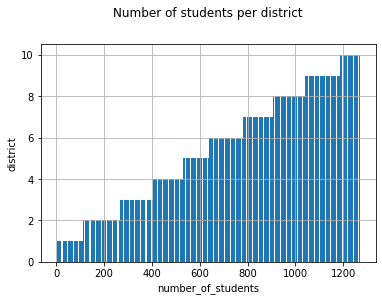

In [ ]:
#displaying the cleaned data
#Number of students per district
import matplotlib.pyplot as plt
df.groupby(["number_of_students"]).median()
plt.bar(df.index, df['district'])
plt.xlabel('number_of_students')
plt.ylabel('district')
plt.title('Number of students per district', y=1.1)
plt.grid()
plt.show()

# df.plot(x="number_of_students", y="district", kind="bar", title="Number of students per district")
# plt.show()

In [ ]:

df["class_size"].value_counts().sort_index()

8      1
9      4
10     6
11    22
12    34
13    14
14     3
15    68
16    75
17    77
18    77
19    85
20    83
21    83
22    82
23    79
24    79
25    78
26    67
27    62
28    58
29    49
30    39
31    18
32    21
33     6
36     1
90     1
Name: class_size, dtype: int64

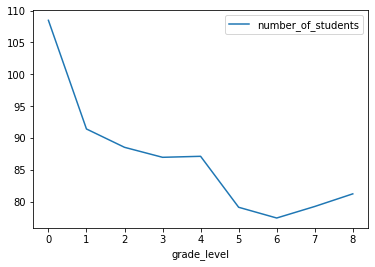

In [ ]:
#Number of students per grade level
df.groupby(["grade_level"]).agg({'number_of_students': 'mean'}).plot(legend = True)

In [ ]:
df_num_classes = df.groupby(["grade_level"]).agg({'number_of_classes': 'sum'})
data_row = df_num_classes["number_of_classes"]
df_num_classes

,number_of_classes
grade_level,
0,670
1,634
2,638
3,637
4,636
5,556
6,478
7,473
8,485


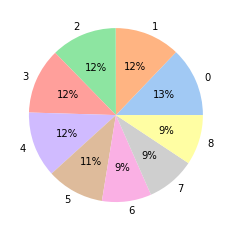

In [ ]:
# declaring data
keys = df["grade_level"].unique()
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
# plotting data on chart
plt.pie(data_row, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [ ]:
print(type(res_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pivot = pd.pivot_table(res_df, 
                       values='agg_number_of_students', 
                       index=['district'], # rows
                       columns=['grade_level']).copy() # aggregation function
pivot

grade_level,0,1,2,3,4,5,6,7,8
district,,,,,,,,,
1,608.0,565.0,543.0,598.0,583.0,607.0,686.0,655.0,561.0
2,2502.0,2411.0,2240.0,2213.0,2285.0,2208.0,2292.0,2346.0,2451.0
3,1040.0,1056.0,1064.0,1015.0,953.0,986.0,1110.0,1132.0,1190.0
4,604.0,594.0,599.0,661.0,619.0,691.0,832.0,833.0,867.0
5,430.0,423.0,493.0,449.0,464.0,512.0,505.0,541.0,539.0
6,1100.0,1135.0,1125.0,1179.0,1196.0,1250.0,1167.0,1220.0,1282.0
7,748.0,727.0,722.0,798.0,843.0,865.0,812.0,842.0,866.0
8,1421.0,1504.0,1535.0,1519.0,1545.0,1645.0,1653.0,1756.0,1713.0
9,1603.0,1561.0,1687.0,1755.0,1739.0,1821.0,1781.0,1846.0,2063.0


In [ ]:
pivot = pivot.fillna(0)

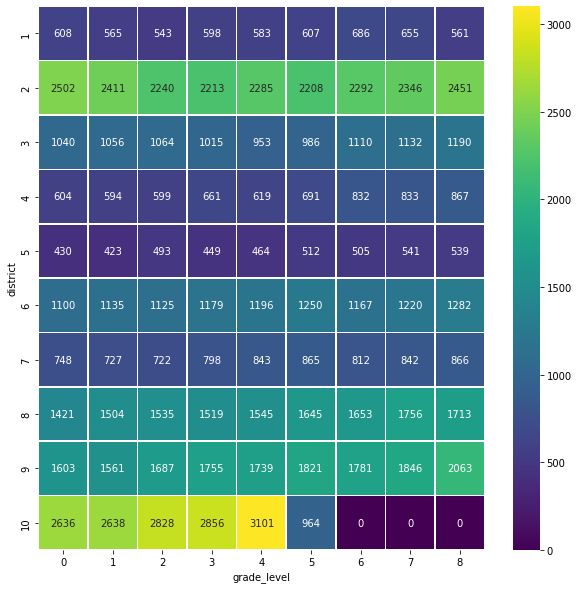

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pivot, annot=True, fmt="g", cmap='viridis', linewidths=0.6, ax=ax)

In [ ]:
res_df_dist = df.groupby(["district"]).agg({'of_students_within_grade' : 'max'})
res_df_dist.columns

Index(['of_students_within_grade'], dtype='object')

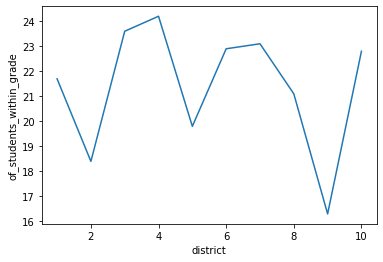

In [ ]:
sns.lineplot(data=res_df_dist, x="district", y="of_students_within_grade")